In [1]:
# Based on Google's Udacity Deep Learning course, Assignments 1-4

%reload_ext autoreload
%autoreload 1
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import os
import os.path
assert os.path.basename(os.getcwd()) == 'notebooks', os.path.basename(os.getcwd())
code_dir = os.path.join(os.getcwd(), os.pardir, 'code')
if code_dir not in sys.path:
    sys.path.append(code_dir)
    os.environ['PYTHONPATH'] = os.environ.get('PYTHONPATH', '') + os.pathsep + code_dir
model_dir = os.path.join(os.getcwd(), os.pardir, 'models')
data_dir = os.path.join(os.getcwd(), os.pardir, 'data')
    
import keras
%aimport keras_util

Using TensorFlow backend.


In [ ]:
from keras.utils import get_file
def get_notmnist_tgz(base):
    notmnist_origin = 'https://commondatastorage.googleapis.com/books1000/'
    subdir = 'notmnist/'
    ext = '.tar.gz'
    get_file(base + ext, notmnist_origin + base + ext, cache_dir=data_dir, cache_subdir=subdir, extract=True)
    return os.path.join(data_dir, subdir, base)

train_dir = get_notmnist_tgz('notMNIST_large')
test_dir = get_notmnist_tgz('notMNIST_small')

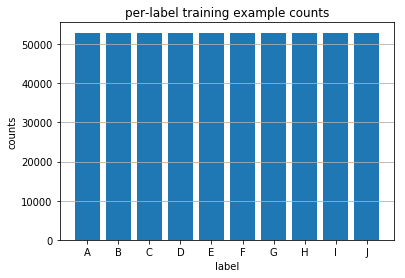

In [18]:
from tabulate import tabulate
import numpy as np

classes = os.listdir(train_dir)
classes.sort()
counts = [len(os.listdir(os.path.join(train_dir, cls))) for cls in classes]

idx = np.arange(len(classes))
plt.bar(idx, counts)
plt.xlabel('label')
plt.ylabel('counts')
plt.title('per-label training example counts')
plt.grid(axis='y')
plt.xticks(idx, classes)
plt.show()

Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

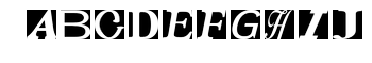

images are 28x28


In [34]:
def fullpath_listdir(dirname):
    return [os.path.join(dirname, fname) for fname in os.listdir(dirname)]    

classdirs = fullpath_listdir(train_dir)
classdirs.sort()
selected_images = [np.random.choice(fullpath_listdir(classdir)) for classdir in classdirs]

from matplotlib.image import imread

# https://stackoverflow.com/questions/36006136/
fig = plt.figure()
for i, f in enumerate(selected_images, start=1):
    ax = fig.add_subplot(1, len(selected_images), i)
    plt.imshow(imread(f), cmap='Greys_r')
    plt.axis('off')

plt.show()

imheight, imwidth = imread(selected_images[0]).shape
print('images are {}x{}'.format(imwidth, imheight))

---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [ ]:
# TODO: do above, but copying to train/test/validation folders. Then print train/valid/test counts

In [ ]:
# TODO: logistic, pre-trianed vgg or whatever keras has pre-trianed.

# follow tutorial on
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
# for fine-tuning
# kerasutil - two-round post-train with validation set helper method

# current best is 97.4%
# http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595

In [33]:

# The entire dataset fits into memory but it'll be good exercise to use
# more convenient tools (which will come in handy for larger datasets)
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    width_shift_range=0.2,
    height_shift_range=0.2, 
    fill_mode='constant')

(28, 28)